# **Adaptive Learning Rate**


**Reference**:
Behera, Laxmidhar, Swagat Kumar, and Awhan Patnaik. "On adaptive learning rate that guarantees convergence in feedforward networks." IEEE transactions on neural networks 17.5 (2006): 1116-1125.

The above paper has been implemented in this ipython notebook. In each of the following cells, the plot of error v/s iterations has been shown for fixed and adaptive learning rate. It can be seen that, the adaptive learning weight update derived from laypnov stability theory improves the convergence speed.

# **XOR**

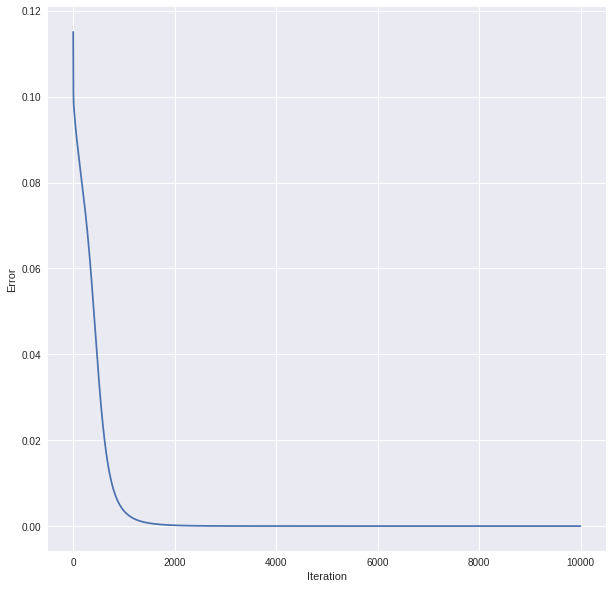

In [1]:
#Fixed learning rate

import numpy as np
x1=[0.1,0.9,0.1,1]
x2=[0.1,0.1,1,1]
o=[0.1,0.9,0.9,0.1]

#contants
iterations=10000
eta=0.3
w=[5*(np.random.rand(3,7)-0.5),5*(np.random.rand(7,1)-0.5)]#no. of neuron X no. of i/p
Efix=[]

for i in range(0,iterations):
  e=[]
  for j in range(0,len(o)):
    x=np.reshape(np.array([x1[j],x2[j],1]),(-1,1))
    h1=np.dot(w[0].T,x)#no. of i/p X 1
    v=1/(1+np.exp(-h1))#no. of i/p X 1
    h2=np.dot(w[1].T,v)#no. of i/p X 1
    y=1/(1+np.exp(-h2))#no. of i/p X 1

    yd=o[j]
    delta2=(yd-y)*y*(1-y)
    delta1=v*(1-v)*w[1]*delta2
    deltaW2=eta*delta2*v
    deltaW1=eta*x*delta1.T
    
    w[0]+=deltaW1
    w[1]+=deltaW2
    
    e.append(np.sum(0.5*np.power(yd-y,2)))
  Efix.append(np.average(e))

# Plot error v/s iterations  
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(Efix)
plt.xlabel('Iteration');
plt.ylabel('Error');


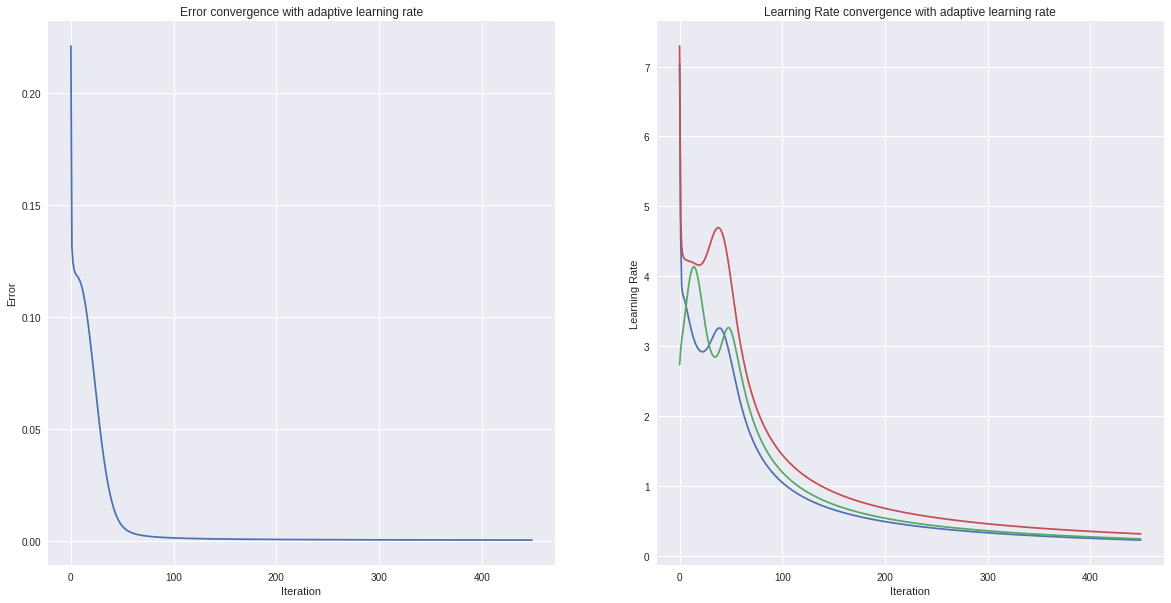

In [7]:
# %reset
#Adaptive learning rate
import numpy as np

x1=[0.1,0.9,0.1,1]
x2=[0.1,0.1,1,1]
o=[0.1,0.9,0.9,0.1]

#contants
iterations=450
eta=0.3
w=[5*(np.random.rand(3,7)-0.5),5*(np.random.rand(7,1)-0.5)]#no. of neuron X no. of i/p
E=[]
mu=0.55
eps=1e-3
etaplot1=[]
etaplot2=[]
etaplot3=[]
etaplot4=[]
etaplot=[]
for i in range(0,iterations):
  e=[]
  for j in range(0,len(o)):
    x=np.reshape(np.array([x1[j],x2[j],1]),(-1,1))
    h1=np.dot(w[0].T,x)#no. of i/p X 1
    v=1/(1+np.exp(-h1))#no. of i/p X 1
    h2=np.dot(w[1].T,v)#no. of i/p X 1
    y=1/(1+np.exp(-h2))#no. of i/p X 1

    yd=o[j]
    delta2=(yd-y)*y*(1-y)
    delta1=v*(1-v)*w[1]*delta2
    
    dEdW2=delta2*v
    dEdW1=x*delta1.T
    Jpy = (np.concatenate((np.reshape(dEdW2,(-1,1)),np.reshape(dEdW1,(-1,1))),axis=0))
    
    eta2=mu*np.power(np.linalg.norm(yd-y,2),2)/(np.power(np.linalg.norm(Jpy,2),2)+eps)
#     print(np.power(np.linalg.norm(yd-y,2),2),np.power(np.linalg.norm(lol,2),2),eta2)
    if j is 1:
      etaplot1.append(eta2)
    elif j is 2:
      etaplot2.append(eta2)
    elif j is 3:
      etaplot3.append(eta2)  
    elif j is 4:
      etaplot4.append(eta2)  
    etaplot.append(eta2)
    deltaW2=eta2*delta2*v
    deltaW1=eta2*x*delta1.T
    
    w[0]+=deltaW1
    w[1]+=deltaW2
    
    e.append(np.sum(0.5*np.power(yd-y,2)))
  E.append(np.average(e))

# print(len(E))
# Plot error v/s iterations  

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(20, 10));
ax[0].plot(E);
ax[0].set_xlabel('Iteration');
ax[0].set_ylabel('Error');
ax[0].set_title('Error convergence with adaptive learning rate');
ax[1].plot(etaplot1)
ax[1].plot(etaplot2)
ax[1].plot(etaplot3)
ax[1].plot(etaplot4)
ax[1].set_xlabel('Iteration');
ax[1].set_ylabel('Learning Rate');
ax[1].set_title('Learning Rate convergence with adaptive learning rate');              

In [0]:
#Output
for j in range(0,len(o)):
  x=np.reshape(np.array([x1[j],x2[j],1]),(-1,1))
  h1=np.dot(w[0].T,x)#no. of i/p X 1
  v=1/(1+np.exp(-h1))#no. of i/p X 1
  h2=np.dot(w[1].T,v)#no. of i/p X 1
  y=1/(1+np.exp(-h2))#no. of i/p X 1
  print(y)

[[0.14003289]]
[[0.85387239]]
[[0.86183122]]
[[0.14476876]]


# **3 Bit Parity**

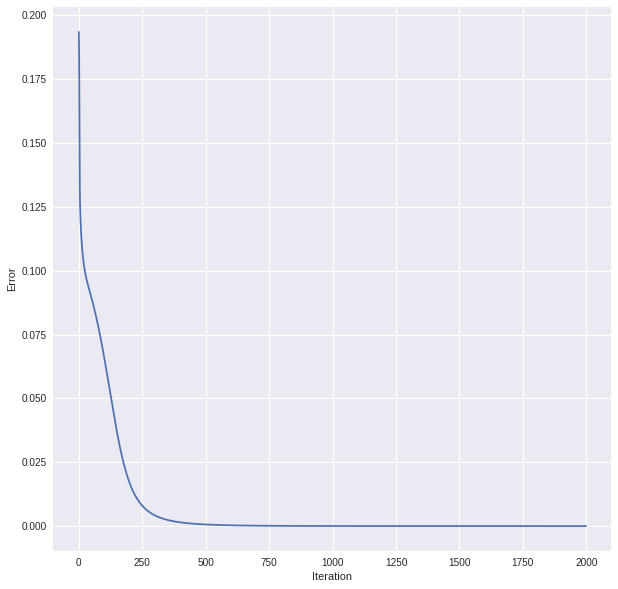

In [0]:
# !reset
#Fixed learning rate

import numpy as np
x1=[0.1,0.9,0.1,0.9,0.1,0.9,0.1,0.9]
x2=[0.1,0.1,0.9,0.9,0.1,0.1,0.9,0.9]
x3=[0.1,0.1,0.1,0.1,0.9,0.9,0.9,0.9]
o =[0.1,0.9,0.9,0.1,0.9,0.1,0.1,0.9]

#contants
iterations=2000
eta=0.5
w=[5*(np.random.rand(4,25)-0.5),5*(np.random.rand(25,1)-0.5)]#no. of neuron X no. of i/p
# w=[(2*np.random.rand(4,25)-1)*0.1,(2*np.random.rand(25,1)-1)*0.01]#no. of neuron X no. of i/p
Efix=[]

for i in range(0,iterations):
  e=[]
  for j in range(0,len(o)):
    x=np.reshape(np.array([x1[j],x2[j],x3[j],1]),(-1,1))
    h1=np.dot(w[0].T,x)#no. of i/p X 1
    v=1/(1+np.exp(-h1))#no. of i/p X 1
    h2=np.dot(w[1].T,v)#no. of i/p X 1
    y=1/(1+np.exp(-h2))#no. of i/p X 1

    yd=o[j]
    delta2=(yd-y)*y*(1-y)
    delta1=v*(1-v)*w[1]*delta2
    deltaW2=eta*delta2*v
    deltaW1=eta*x*delta1.T
    
    w[0]+=deltaW1
    w[1]+=deltaW2
    
    e.append(np.sum(0.5*np.power(yd-y,2)))
  Efix.append(np.average(e))

# Plot error v/s iterations  
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(Efix)
plt.xlabel('Iteration');
plt.ylabel('Error');


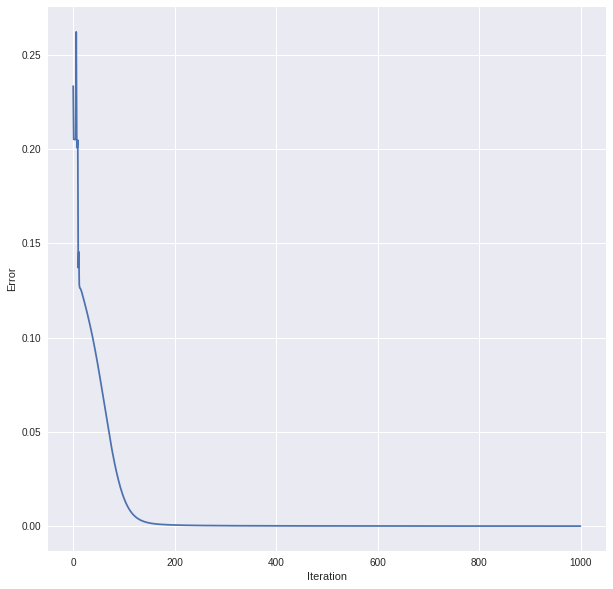

In [0]:
# %reset
#Adaptive learning rate
import numpy as np

x1=[0.1,0.9,0.1,0.9,0.1,0.9,0.1,0.9]
x2=[0.1,0.1,0.9,0.9,0.1,0.1,0.9,0.9]
x3=[0.1,0.1,0.1,0.1,0.9,0.9,0.9,0.9]
o =[0.1,0.9,0.9,0.1,0.9,0.1,0.1,0.9]

#contants
iterations=1000
eta=0.3
w=[5*(np.random.rand(4,25)-0.5),5*(np.random.rand(25,1)-0.5)]#no. of neuron X no. of i/p
# w=[np.random.rand(4,25),np.random.rand(25,1)]#no. of neuron X no. of i/p
mu=0.55
eps=1e-3
E=[]
for i in range(0,iterations):
  e=[]
  for j in range(0,len(o)):
    x=np.reshape(np.array([x1[j],x2[j],x3[j],1]),(-1,1))
    h1=np.dot(w[0].T,x)#no. of i/p X 1
    v=1/(1+np.exp(-h1))#no. of i/p X 1
    h2=np.dot(w[1].T,v)#no. of i/p X 1
    y=1/(1+np.exp(-h2))#no. of i/p X 1

    yd=o[j]
    delta2=(yd-y)*y*(1-y)
    delta1=v*(1-v)*w[1]*delta2
    
    dEdW2=delta2*v
    dEdW1=x*delta1.T
    Jpy = (np.concatenate((np.reshape(dEdW2,(-1,1)),np.reshape(dEdW1,(-1,1))),axis=0))
    
    eta2=mu*np.power(np.linalg.norm(yd-y,2),2)/(np.power(np.linalg.norm(Jpy,2),2)+eps)
#     print(np.power(np.linalg.norm(yd-y,2),2),np.power(np.linalg.norm(lol,2),2),eta2)
    deltaW2=eta2*delta2*v
    deltaW1=eta2*x*delta1.T
    
    w[0]+=deltaW1
    w[1]+=deltaW2
    
    e.append(np.sum(0.5*np.power(yd-y,2)))
  E.append(np.average(e))

# print(len(E))
# Plot error v/s iterations  
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(E)
plt.xlabel('Iteration');
plt.ylabel('Error');


In [0]:
print('predicted:')
for j in range(0,len(o)):
  x=np.reshape(np.array([x1[j],x2[j],x3[j],1]),(-1,1))
  h1=np.dot(w[0].T,x)#no. of i/p X 1
  v=1/(1+np.exp(-h1))#no. of i/p X 1
  h2=np.dot(w[1].T,v)#no. of i/p X 1
  y=1/(1+np.exp(-h2))[0]#no. of i/p X 1
  print(y[0])
print('desired:')
print(o)

predicted:
0.11100550280375529
0.8913916450659641
0.8887233972904982
0.10751298838626187
0.8865050766378801
0.11187010753037167
0.11356475293627684
0.8885035461250486
desired:
[0.1, 0.9, 0.9, 0.1, 0.9, 0.1, 0.1, 0.9]


# **8:3 Encoder**

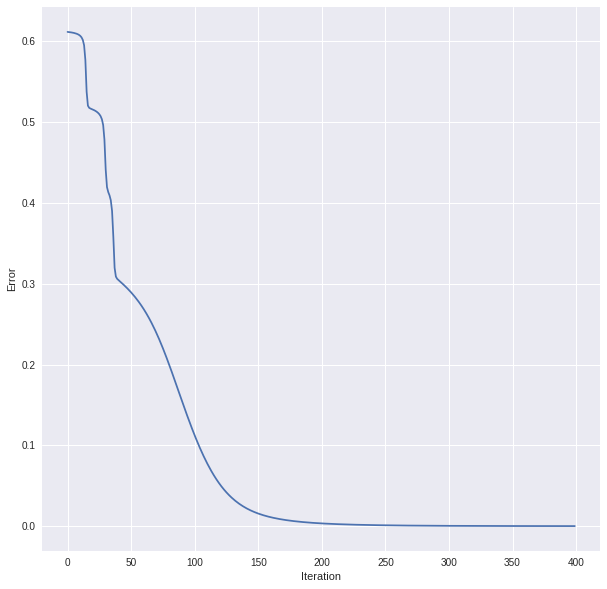

In [0]:
# !reset
#Fixed learning rate

import numpy as np
x0=[0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
x1=[0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.1]
x2=[0.1,0.1,0.9,0.1,0.1,0.1,0.1,0.1]
x3=[0.1,0.1,0.1,0.9,0.1,0.1,0.1,0.1]
x4=[0.1,0.1,0.1,0.1,0.9,0.1,0.1,0.1]
x5=[0.1,0.1,0.1,0.1,0.1,0.9,0.1,0.1]
x6=[0.1,0.1,0.1,0.1,0.1,0.1,0.9,0.1]
x7=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.9]

o0 =[0.1,0.9,0.1,0.9,0.1,0.9,0.1,0.9]
o1 =[0.1,0.1,0.9,0.9,0.1,0.1,0.9,0.9]
o2 =[0.1,0.1,0.1,0.1,0.9,0.9,0.9,0.9]

#contants
iterations=400
eta=0.5
w=[np.random.rand(9,16),np.random.rand(16,3)]#no. of neuron X no. of i/p
Efix=[]

for i in range(0,iterations):
  e=[]
  for j in range(0,len(x0)):
    x=np.reshape(np.array([x0[j],x1[j],x2[j],x3[j],x4[j],x5[j],x6[j],x7[j],1]),(-1,1))
    h1=np.dot(w[0].T,x)#no. of i/p X 1
    v=1/(1+np.exp(-h1))#no. of i/p X 1
    h2=np.dot(w[1].T,v)#no. of i/p X 1
    y=1/(1+np.exp(-h2))#no. of i/p X 1

    yd=np.reshape(np.array([o0[j],o1[j],o2[j]]),(-1,1))
    delta2=(yd-y)*y*(1-y)
#     print(v.shape,delta2.shape)
#     break
    tmp=v*(1-v)
    tmp2=np.dot(w[1],delta2)
    delta1=tmp*tmp2
    deltaW2=eta*v*delta2.T
    deltaW1=eta*np.dot(x,delta1.T)
#     print(v.shape,delta2.shape)
    w[0]+=deltaW1
    w[1]+=deltaW2
    
    e.append(np.sum(0.5*np.power(yd-y,2)))
  Efix.append(np.average(e))

# Plot error v/s iterations  
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(Efix)
plt.xlabel('Iteration');
plt.ylabel('Error');


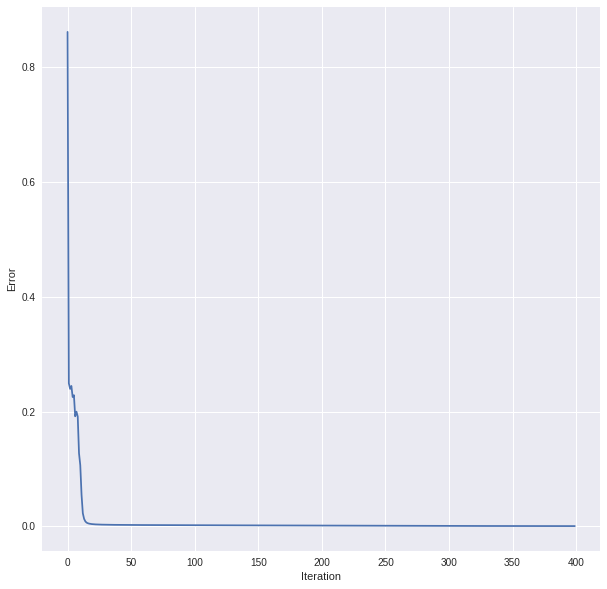

In [0]:
# !reset
# Adaptive learning rate
import numpy as np
x0=[0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
x1=[0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.1]
x2=[0.1,0.1,0.9,0.1,0.1,0.1,0.1,0.1]
x3=[0.1,0.1,0.1,0.9,0.1,0.1,0.1,0.1]
x4=[0.1,0.1,0.1,0.1,0.9,0.1,0.1,0.1]
x5=[0.1,0.1,0.1,0.1,0.1,0.9,0.1,0.1]
x6=[0.1,0.1,0.1,0.1,0.1,0.1,0.9,0.1]
x7=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.9]

o0 =[0.1,0.9,0.1,0.9,0.1,0.9,0.1,0.9]
o1 =[0.1,0.1,0.9,0.9,0.1,0.1,0.9,0.9]
o2 =[0.1,0.1,0.1,0.1,0.9,0.9,0.9,0.9]

#contants
iterations=400
# eta=0.5
w=[np.random.rand(9,16),np.random.rand(16,3)]#no. of neuron X no. of i/p
Efix=[]
mu=0.55
eps=1e-3

for i in range(0,iterations):
  e=[]
  for j in range(0,len(x0)):
    x=np.reshape(np.array([x0[j],x1[j],x2[j],x3[j],x4[j],x5[j],x6[j],x7[j],1]),(-1,1))
    h1=np.dot(w[0].T,x)#no. of i/p X 1
    v=1/(1+np.exp(-h1))#no. of i/p X 1
    h2=np.dot(w[1].T,v)#no. of i/p X 1
    y=1/(1+np.exp(-h2))#no. of i/p X 1

    yd=np.reshape(np.array([o0[j],o1[j],o2[j]]),(-1,1))
    delta2=(yd-y)*y*(1-y)
    tmp=v*(1-v)
    tmp2=np.dot(w[1],delta2)
    delta1=tmp*tmp2
    
    dEdW2=v*delta2.T
    dEdW1=np.dot(x,delta1.T)
    Jpy = (np.concatenate((np.reshape(dEdW2,(-1,1)),np.reshape(dEdW1,(-1,1))),axis=0))
    
    eta2=mu*np.power(np.linalg.norm(yd-y,2),2)/(np.power(np.linalg.norm(Jpy,2),2)+eps)
    
    deltaW2=eta2*v*delta2.T
    deltaW1=eta2*np.dot(x,delta1.T)
#     print(v.shape,delta2.shape)
    w[0]+=deltaW1
    w[1]+=deltaW2
    
    e.append(np.sum(0.5*np.power(yd-y,2)))
  Efix.append(np.average(e))

# Plot error v/s iterations  
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(Efix)
plt.xlabel('Iteration');
plt.ylabel('Error');


In [0]:
for j in range(0,len(x0)):
  x=np.reshape(np.array([x0[j],x1[j],x2[j],x3[j],x4[j],x5[j],x6[j],x7[j],1]),(-1,1))
  h1=np.dot(w[0].T,x)#no. of i/p X 1
  v=1/(1+np.exp(-h1))#no. of i/p X 1
  h2=np.dot(w[1].T,v)#no. of i/p X 1
  y=1/(1+np.exp(-h2))#no. of i/p X 1
  print(y)
  

[[0.09015077]
 [0.11845797]
 [0.08457016]]
[[0.89516314]
 [0.11068904]
 [0.07722554]]
[[0.10388979]
 [0.87994269]
 [0.10061699]]
[[0.89682982]
 [0.88095099]
 [0.11474134]]
[[0.10296611]
 [0.09018846]
 [0.93608489]]
[[0.8989669 ]
 [0.09518352]
 [0.9347481 ]]
[[0.10161929]
 [0.92064679]
 [0.87023   ]]
[[0.90104895]
 [0.90346213]
 [0.92175621]]


# **2D Gabor Function**



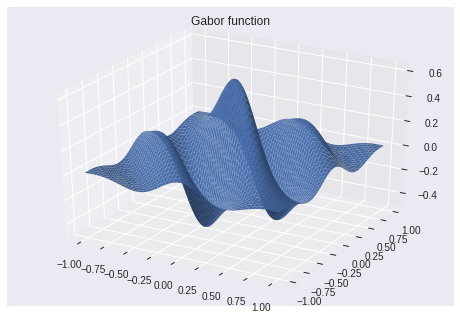

In [0]:
# !reset
import numpy as np

#for visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1=np.arange(-0.5,0.5,0.01)
x2=np.arange(-0.5,0.5,0.01)
x1, x2 = np.meshgrid(x1, x2)
g=(1/(2*np.pi*0.25))*np.exp(np.divide(np.power(x1,2)+np.power(x2,2),-2*0.25))*np.cos(2*np.pi*(x1+x2))

ax.plot_surface(x1, x2, g)

plt.title('Gabor function')
plt.show()
